In [1]:
import numpy as np
import matplotlib.pyplot as plt

Transition_Mat = np.array([[0,0,1,0,0,0,0,0,0,0],[0.5,0,0,0,0,0,0,0,0.5,0],[0,0.5,0,0,0,0,0.5,0,0,0],[0,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0.5,0,0,0.5,0,0],[0,0,0,0,0,0.5,0,0,0,0],[0,0.5,0,0,0.5,0,0,0,0,1],
             [0.5,0,0,0,0,0,0.5,0.5,0,0],[0,0,0,0,0,0.5,0,0,0.5,0]])
print(Transition_Mat)

[[0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.5 0. ]]


In [3]:
x = np.random.rand(10)
x_normalized = x / np.linalg.norm(x)

error_residuals = []
vector_changes = []
eigenvalues = []

iterations_count = 100
for iteration in range(iterations_count):
    previous_x = x_normalized    
    y = np.dot(Transition_Mat, previous_x)
    x_normalized = y / np.linalg.norm(y)
    
    eigenvalue_approx = np.dot(x_normalized.T, np.dot(Transition_Mat, x_normalized))
    eigenvalues.append(eigenvalue_approx)
    
    residual = np.linalg.norm(np.dot(Transition_Mat, x_normalized) - eigenvalue_approx * x_normalized)
    error_residuals.append(residual)
    
    vector_difference = np.linalg.norm(x_normalized - previous_x)
    vector_changes.append(vector_difference)

print("Final EigenVector: ", x_normalized)
print("Final EigenValue: ", eigenvalue_approx)

Final EigenVector:  [0.24703936 0.35683462 0.24703935 0.         0.         0.27448818
 0.13724409 0.54897633 0.4666299  0.37055903]
Final EigenValue:  1.0000000019459507


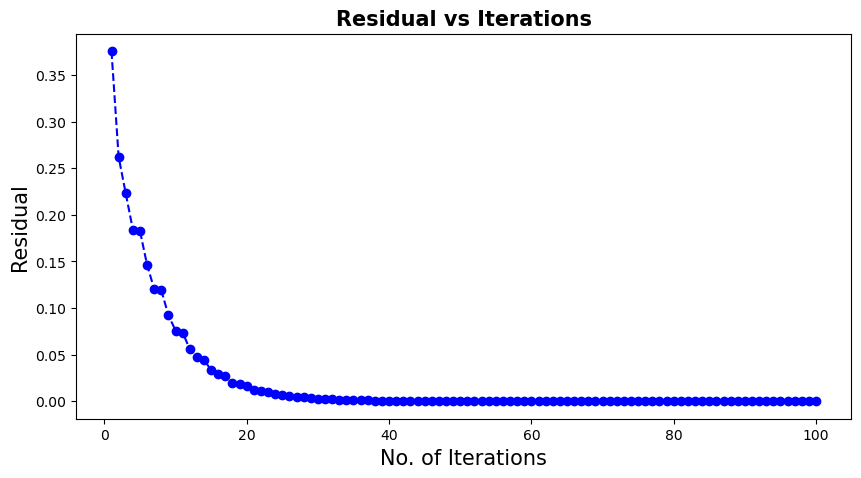

In [5]:
fig = plt.figure(figsize=(10,5))
plt.xlabel('No. of Iterations', size=15)
plt.ylabel('Residual', size=15)
plt.title('Residual vs Iterations', size = 15, fontweight="bold")

plt.plot(range(1, iterations_count + 1), error_residuals, 'bo--')
plt.savefig('residual.jpg')

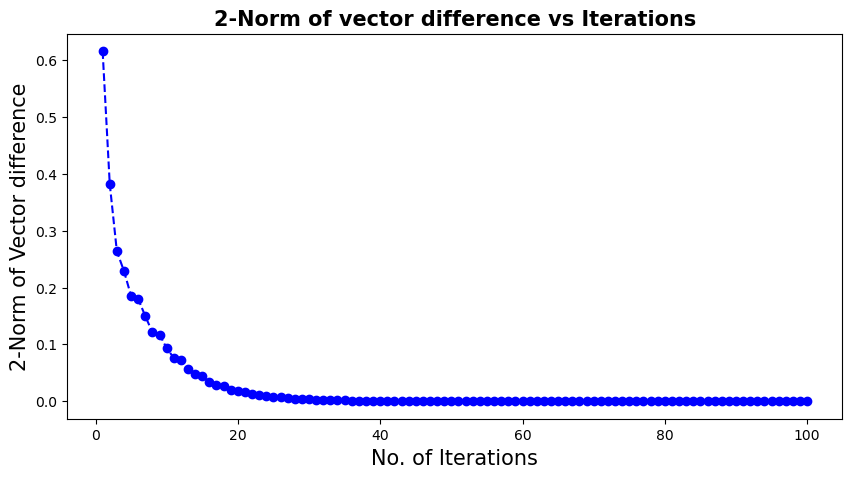

In [6]:
fig = plt.figure(figsize=(10,5))
plt.xlabel('No. of Iterations', size=15)
plt.ylabel('2-Norm of Vector difference', size=15)
plt.title('2-Norm of vector difference vs Iterations', size = 15, fontweight="bold")

plt.plot(range(1, iterations_count + 1), vector_changes, 'bo--')
plt.savefig('vect_diff.jpg')

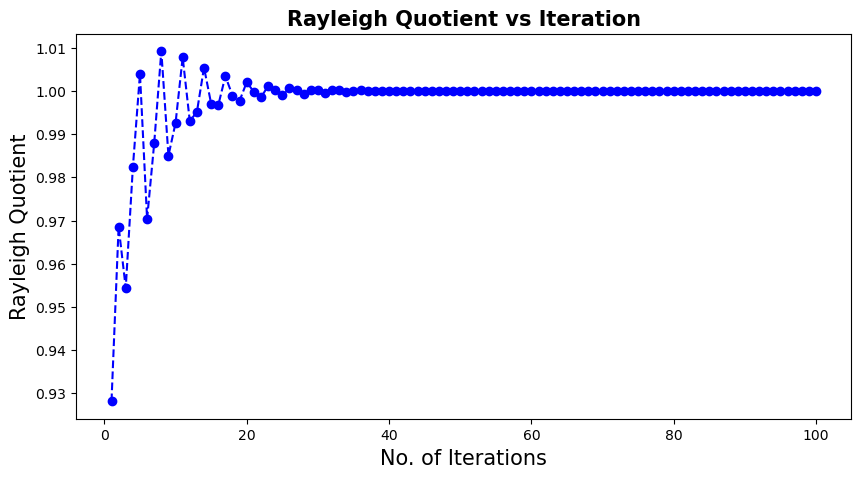

In [8]:
fig = plt.figure(figsize=(10,5))
plt.xlabel('No. of Iterations', size=15)
plt.ylabel('Rayleigh Quotient', size=15)
plt.title('Rayleigh Quotient vs Iteration', size = 15, fontweight="bold")

plt.plot(range(1, iterations_count + 1), eigenvalues, 'bo--')
plt.savefig('rayleigh.jpg')

In [11]:
least_page_rank = min(x_normalized)
highest_page_rank = max(x_normalized)

least_node = np.where(x_normalized == least_page_rank)
highest_node = np.where(x_normalized == highest_page_rank)

In [13]:
print(least_node)
print(highest_node)

(array([3, 4], dtype=int64),)
(array([7], dtype=int64),)
